# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [5]:
# Important Libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# import the Mouse_metadata and the study results datsets
mouse_dataset = pd.read_csv("Mouse_metadata.csv")
study_dataset = pd.read_csv("Study_results.csv")

# Combine the data into a single dataset using an outer join
# returns all rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere
merged = pd.merge(mouse_dataset, study_dataset, on='Mouse ID', how='outer')
merged.head()

# Sort merged database by Tumor Volume to allow for median values to be correct
merged_sort = merged.sort_values(["Tumor Volume (mm3)"], ascending=True)

merged_sort.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Identify the diferrent Drug Regimen along with the total tumer volume for each using .groupby
Drug_Regimen_groupby = merged_sort.groupby(["Drug Regimen"])


#mean of each regimen
Drug_Regimen_groupby_mean = Drug_Regimen_groupby["Tumor Volume (mm3)"].mean()

#median of each regimen
Drug_Regimen_groupby_median = Drug_Regimen_groupby["Tumor Volume (mm3)"].median()

#variance of each regimen
Drug_Regimen_groupby_variance = Drug_Regimen_groupby["Tumor Volume (mm3)"].var()

#standard deviation of each regimen
Drug_Regimen_groupby_std = Drug_Regimen_groupby["Tumor Volume (mm3)"].std()

#SEM of each regimen
Drug_Regimen_groupby_sem = Drug_Regimen_groupby["Tumor Volume (mm3)"].sem()

Summary_Statistics = pd.DataFrame({"Mean": Drug_Regimen_groupby_mean, "Median":Drug_Regimen_groupby_median, "Variance":Drug_Regimen_groupby_variance, "Standard Deviation": Drug_Regimen_groupby_std, "SEM": Drug_Regimen_groupby_sem})
Summary_Statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
#Groupby drug regimen with .count and mouse id to determine the datapoints
Drug_Regimen_points = merged.groupby(["Drug Regimen"]).count()["Mouse ID"]
Drug_Regimen_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

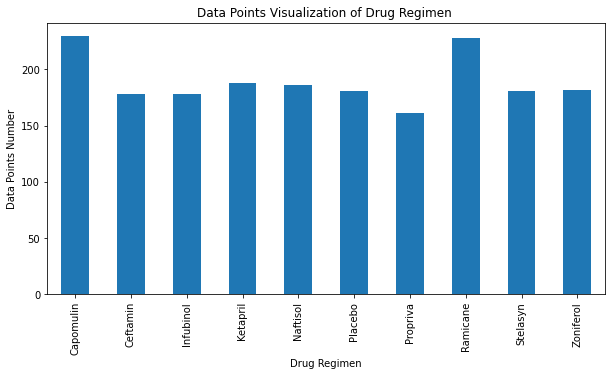

In [19]:
#bar plot showing number of data points for each treatment regimen using pandas
Drug_Regimen_points.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Data Points Visualization of Drug Regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points Number")
plt.show()

Text(0, 0.5, 'Data Points Number')

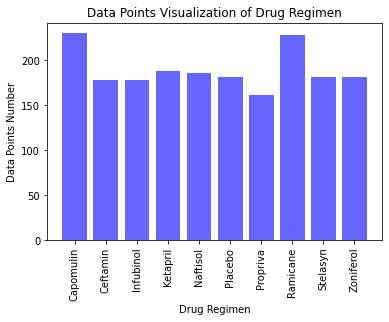

In [22]:
# bar plot showing number of data points for each treatment regimen using pyplot

#Create an arraw with the datapoints
values = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(Drug_Regimen_points))

plt.bar(x_axis, values, color='blue', alpha=0.6, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')


plt.title("Data Points Visualization of Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points Number")

In [23]:
#Group by "Mouse ID" and "Sex" to find the unique number of Male vs Female
groupby_sex = merged.groupby(["Mouse ID","Sex"])
groupby_sex

mouse_sex_dataframe = pd.DataFrame(groupby_sex.size())

#Create the dataframe with total count of Female and Male mice
mouse_sex = pd.DataFrame(mouse_sex_dataframe.groupby(["Sex"]).count())
mouse_sex.columns = ["Total Count"]

# format the percentage of female vs male
mouse_sex["Percentage of Sex"] = (100*(mouse_sex["Total Count"]/mouse_sex["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_sex["Percentage of Sex"] = mouse_sex["Percentage of Sex"]

#gender_dataframe
mouse_sex

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


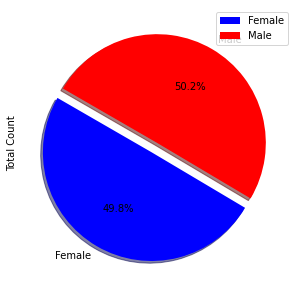

In [31]:
#  pie plot showing the distribution of female versus male mice using pandas
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_sex.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=150, explode = explode, shadow = True, autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0xc89b7ba5c0>,
 [Text(-0.6065178044459586, -1.0354400769190142, 'Female'),
  Text(0.5559745652093047, 0.9491534558965293, 'Male')],
 [Text(-0.35380205259347586, -0.6040067115360916, '49.8%'),
  Text(0.30325885375052974, 0.5177200668526524, '50.2%')])

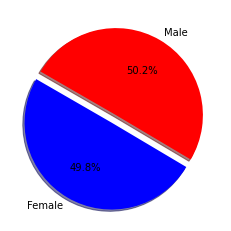

In [34]:
# pie plot showing the distribution of female versus male mice using pyplot

# Labels for of the pie chart
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.8,50.2]

#Set colors for each section of the pie
colors = ['blue', 'red']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)


## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 

regimes_best = merged[merged["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimes_best = regimes_best.sort_values(["Timepoint"], ascending=True)
regimes_best

dataframe_best_regimes = regimes_best[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
dataframe_best_regimes


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


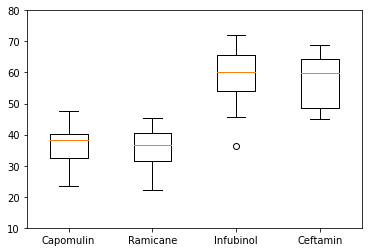

In [36]:
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
sort_best_regimens = dataframe_best_regimes.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
sort_best_regimens.head()

# Turn retrieved data into dataframe to easily manipulate
dataframe_best_regimen = sort_best_regimens.to_frame()

#list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
dataframe_final = dataframe_best_regimen.reset_index()
list_of_tumor = dataframe_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
list_of_tumor_dataframe = pd.DataFrame(list_of_tumor)
list_of_tumor_dataframe = list_of_tumor_dataframe.reindex(top_4)
tumor_volume = [vol for vol in list_of_tumor_dataframe['Tumor Volume (mm3)']]
plt.boxplot(tumor_volume, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

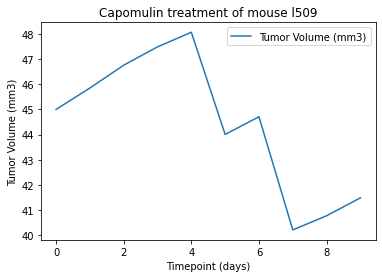

In [37]:
# line plot of time point versus tumor volume for a mouse treated with Capomulin
tumer_vs_time = merged[merged["Mouse ID"].isin(["l509"])]

dataframe_tumer_vs_time = tumer_vs_time[["Mouse ID", "Tumor Volume (mm3)"]]

dataframe_line_plot = dataframe_tumer_vs_time.reset_index()

dataframe_line_plot_final = dataframe_line_plot[["Mouse ID", "Tumor Volume (mm3)"]]

lines = dataframe_line_plot_final.plot.line()
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

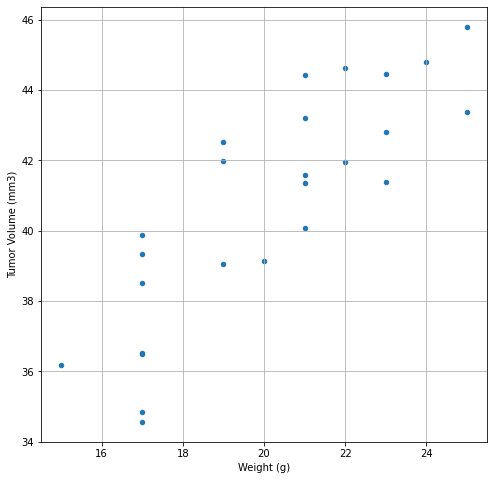

In [39]:
# scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_capomulin = merged[merged["Drug Regimen"].isin(["Capomulin"])]

dataframe_scatter_capomulin = regimes_best[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

scatter_capomulin_sorted = scatter_capomulin.sort_values(["Weight (g)"], ascending=True)

scatter_capomulin_plot =scatter_capomulin.reset_index()

scatter_capomulin_grouped_weight = scatter_capomulin_plot.groupby(['Mouse ID']).mean()

scatter_capomulin_grouped_plot = pd.DataFrame(scatter_capomulin_grouped_weight).reset_index()

scatter_capomulin_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))


## Correlation and Regression

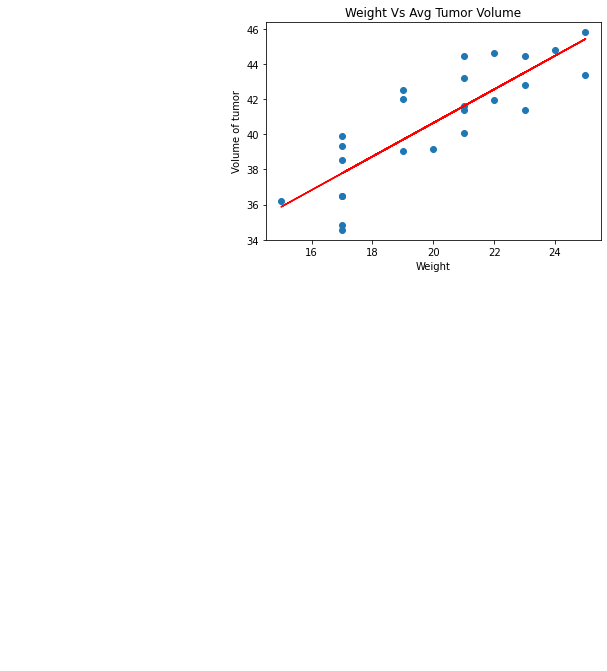

In [43]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = scatter_capomulin_grouped_plot["Weight (g)"]
y_values = scatter_capomulin_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Volume of tumor")
plt.title("Weight Vs Avg Tumor Volume")
plt.show()